<a href="https://colab.research.google.com/github/GeraldL19/Final-Year-Project-2024/blob/main/w1827534_Final_EDA_Data_Preparation_24_04_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
# Data analysis and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Imputer
from sklearn.experimental import enable_iterative_imputer

# Imputer
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from numpy import mean, std

In [ ]:
# Import dataset from GoogleDrive
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Exploratory Data Analysis**

# Basic information

In [ ]:
df.shape

(32581, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Data types are as expected.

In [ ]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [ ]:
# Set numerical values notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000,32581.000,31686.000,32581.000,29465.000,32581.000,32581.000,32581.000
mean,27.735,66074.848,4.790,9589.371,11.012,0.218,0.170,5.804
std,6.348,61983.119,4.143,6322.087,3.240,0.413,0.107,4.055
min,20.000,4000.000,0.000,500.000,5.420,0.000,0.000,2.000
25%,23.000,38500.000,2.000,5000.000,7.900,0.000,0.090,3.000
50%,26.000,55000.000,4.000,8000.000,10.990,0.000,0.150,4.000
75%,30.000,79200.000,7.000,12200.000,13.470,0.000,0.230,8.000
max,144.000,6000000.000,123.000,35000.000,23.220,1.000,0.830,30.000


In [ ]:
df.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


*   The dataset has a total of 12 variables and 32581 observations.<br>
*   7 Numeric variables of variable range, 4 Categorical and 1 Boolean (loan_status).<br>
*   The range of each variable is very different, this will cause a problem with the algorithms therefore the data will have to scaled before modeling.


# Target Variable Analysis

The target variable is the variable 'loan_status'. This variables indicate if an applicant has defaulted (1) or paid-off (0) his loan.

Text(0.5, 1.0, 'Loan Status Distribution')

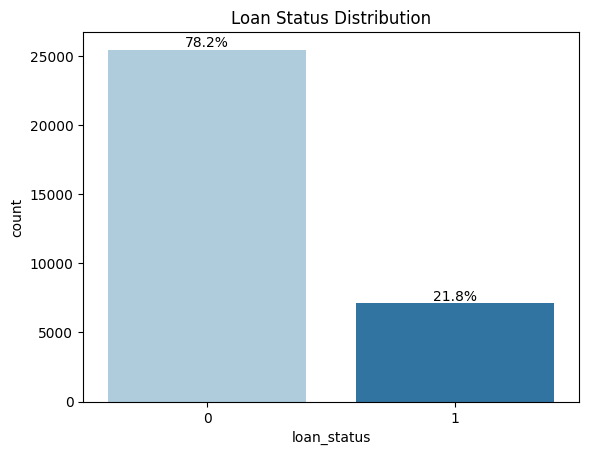

In [ ]:
# Count the occurrences of each value
value_counts = df['loan_status'].value_counts()

sns.countplot(x='loan_status', data=df, palette='Paired')

# Add percentage labels
total_data_points = len(df['loan_status'])
for index, value in enumerate(value_counts):
    percentage = (value / total_data_points) * 100
    plt.text(index, value + 2, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Loan Status Distribution')

*   **The target variable is displaying some imbalance with only 21.6% of cases being 'default'**.<br>
*   This can cause some biases with the algorithms, therefore we need to pay attention to specific accuracy metrics during the testing and validation face to ensure there is no biases towards the majority class.<br>
*   If this imbalance is affecting the performance of our algorithms  there might be a need to use techniques such as SMOTE resampling to help mitigate its effect.



# Categorical Variables Analysis

In [ ]:
# Function to create bar chart of categorical variable distribution
def plot_categorical_distrib(data, column):
    # Calculate value counts and sort in descending order
    counts = data[column].value_counts().sort_values(ascending=False)
    sns.countplot(x=column, data=data, order=counts.index, palette='Paired')

    # Add percentage labels
    total_data_points = len(data[column])
    for index, value in enumerate(counts):
        percentage = (value / total_data_points) * 100
        plt.text(index, value + 2, f'{percentage:.1f}%', ha='center', va='bottom')

    # Labels
    plt.xticks(rotation=45)
    plt.title(f'{column} Distribution')

    plt.show()

In [ ]:
# Function to create stacked bar chart of categorical variable distribution by 'loan_status'
def plot_stacked_bar(data, category_col, status_col):
    # Create a DataFrame for the stacked bar chart
    df_stacked = pd.crosstab(df[category_col], df[status_col], normalize='index') * 100

    # Plot the stacked bar chart
    sns.set_palette('Paired')
    ax = df_stacked.plot(kind='bar', stacked=True)

    # Add percentage labels
    for i, (index, row) in enumerate(df_stacked.iterrows()):
        height = 0
        for j, value in enumerate(row):
            if value > 2:  # Threshold to avoid overlap if % too small
                ax.text(i, height + value / 2, f'{value:.1f}%', ha='center', va='center', color='black', fontsize=8)
            height += value

    # Labels
    ax.legend(['Paid off', 'Default'], title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'{category_col} Distribution by {status_col}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)

    plt.show()

**Home Ownership**

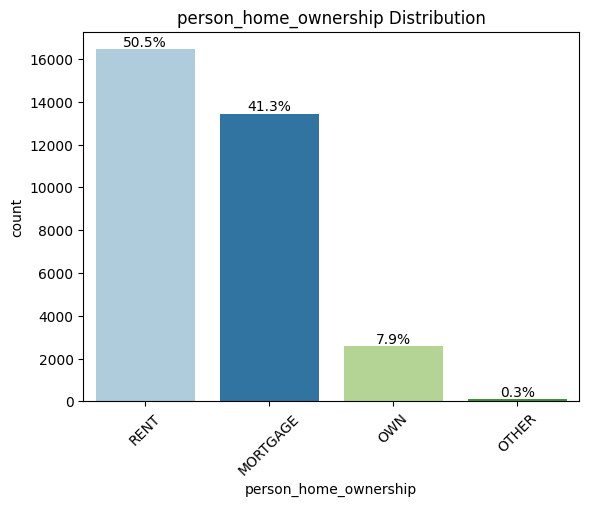

In [ ]:
plot_categorical_distrib(df, 'person_home_ownership')

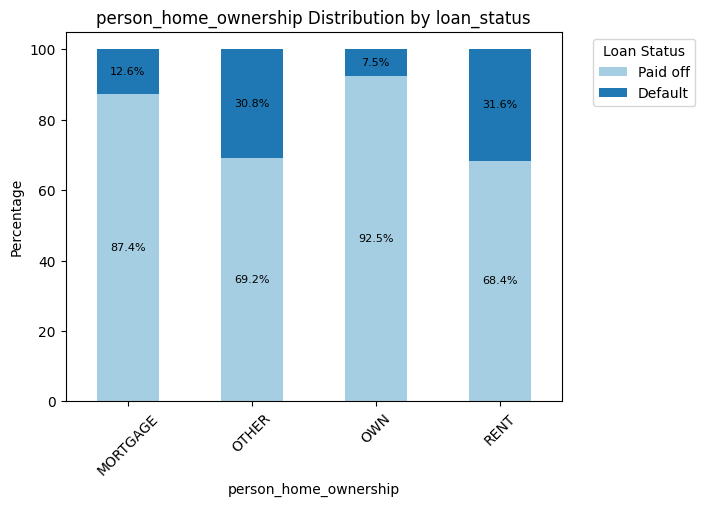

In [ ]:
plot_stacked_bar(df, 'person_home_ownership', 'loan_status')

*   We can observe that a majority or applicant either has a mortgage (41.3%) or rent (50.8%) their home, making up 91.2% of the whole datasets. Meaning most applicant do not own their home.<br>
*   'Other' has a very small number of cases with only 106 cases (0.3%)<br>
*   There is a higher number of loan where the applicant is either renting or 'other' are defaulting (31.1%) compared to applicants with a mortgage (12.5%).<br>
*   Home owners are highly likely to pay back their loan (93.1%).






**Loan Grade**

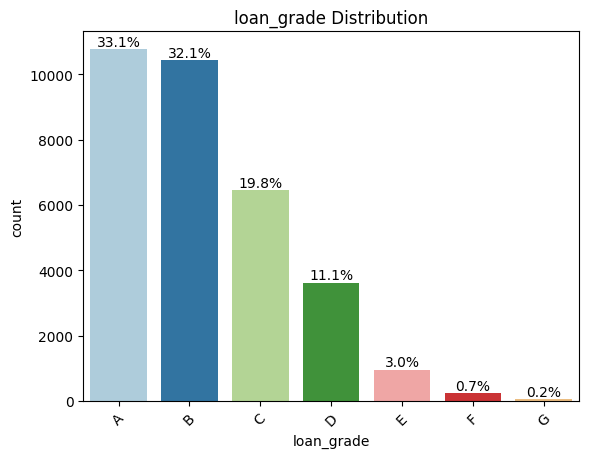

In [ ]:
plot_categorical_distrib(df, 'loan_grade')

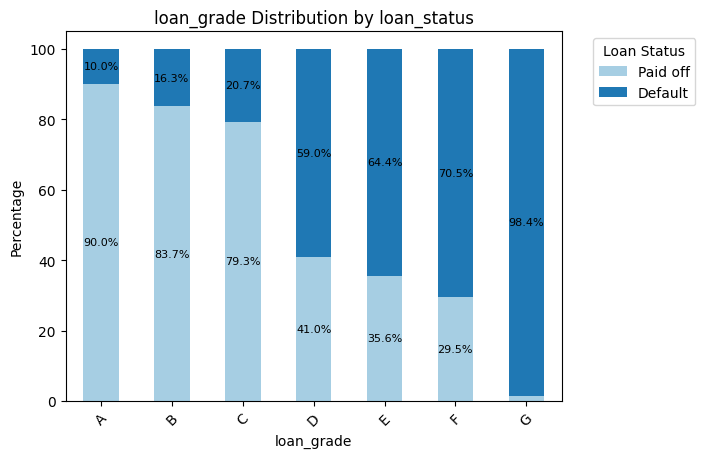

In [ ]:
plot_stacked_bar(df, 'loan_grade', 'loan_status')

*   Loan of grade A and B are the most frequent one, representing 65.2% of the dataset. On the other hand loan of grade E,F and G together represent less than 4% of cases.
*   For Loan of grade A, B, and C the vast majority of the loans have been paid off >=79%, it is the opposite for loans of grade D, E, F and G <=42%.



**Loan Intent**

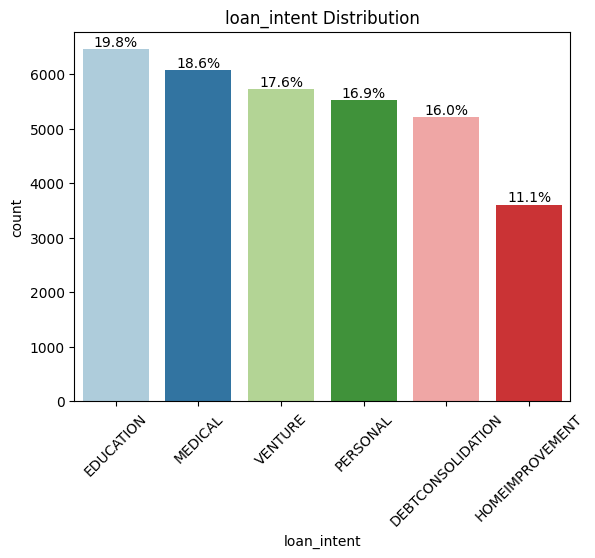

In [ ]:
plot_categorical_distrib(df, 'loan_intent')

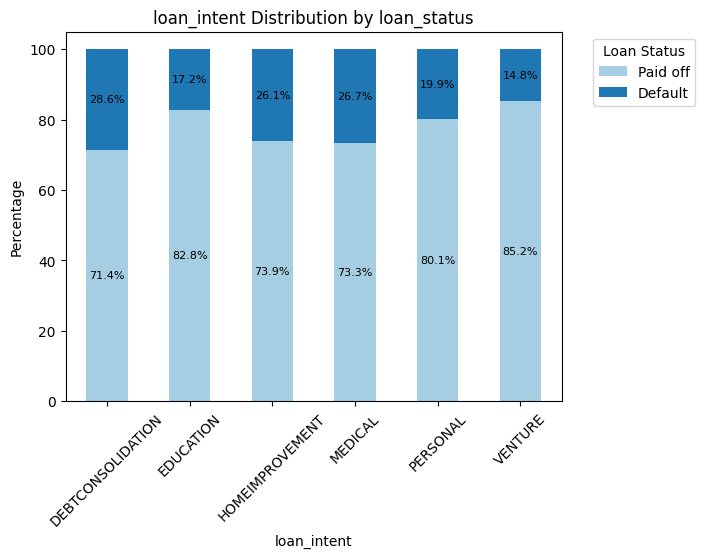

In [ ]:
plot_stacked_bar(df, 'loan_intent', 'loan_status')

*   Each class has between 5000 and 6500 cases except Home Improvement, which has a slightly lower total number.
*   The ratio of Paid-off to Default is roughly the same for each loan intent, between 15% and 30% of cases having defaulted.  



**Person previously defaulted**

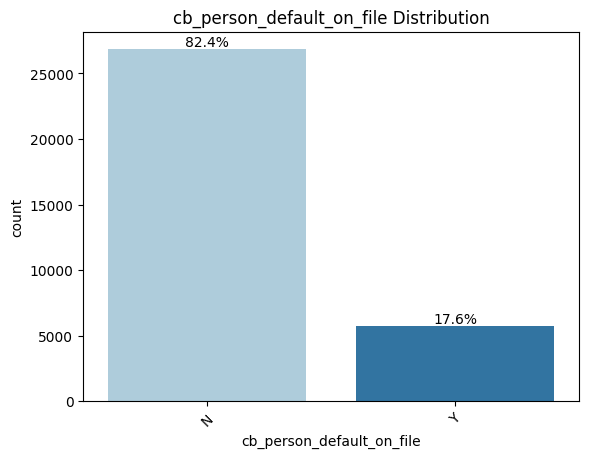

In [ ]:
plot_categorical_distrib(df, 'cb_person_default_on_file')

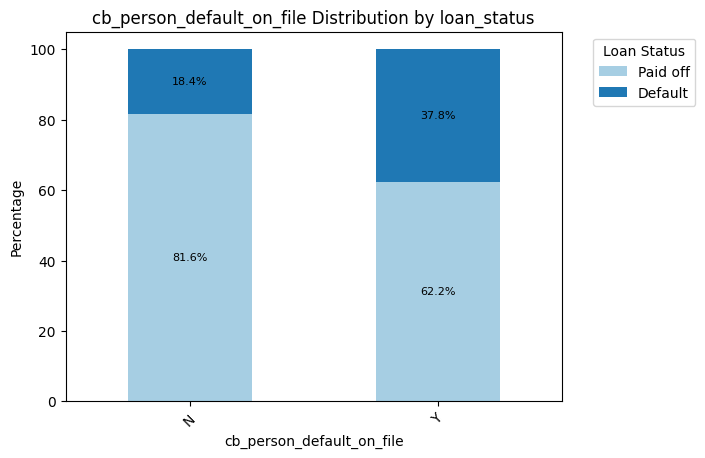

In [ ]:
plot_stacked_bar(df, 'cb_person_default_on_file', 'loan_status')

*   **N**: No previous default, **Y**: Previously defaulted

*   We can see that 82.4% of all loan applicants never had previously defaulted.From the applicants that never defaulted previously only 18.4% Defaulted on their loan.
*   If an applicant had previously defaulted on a loan he is more like to default again, with 37.9% of applicant with previous default, defaulting on their current loan.

# Multivariate distribution

**Person Age across Loan Intent**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'PERSONAL'),
  Text(1, 0, 'EDUCATION'),
  Text(2, 0, 'MEDICAL'),
  Text(3, 0, 'VENTURE'),
  Text(4, 0, 'HOMEIMPROVEMENT'),
  Text(5, 0, 'DEBTCONSOLIDATION')])

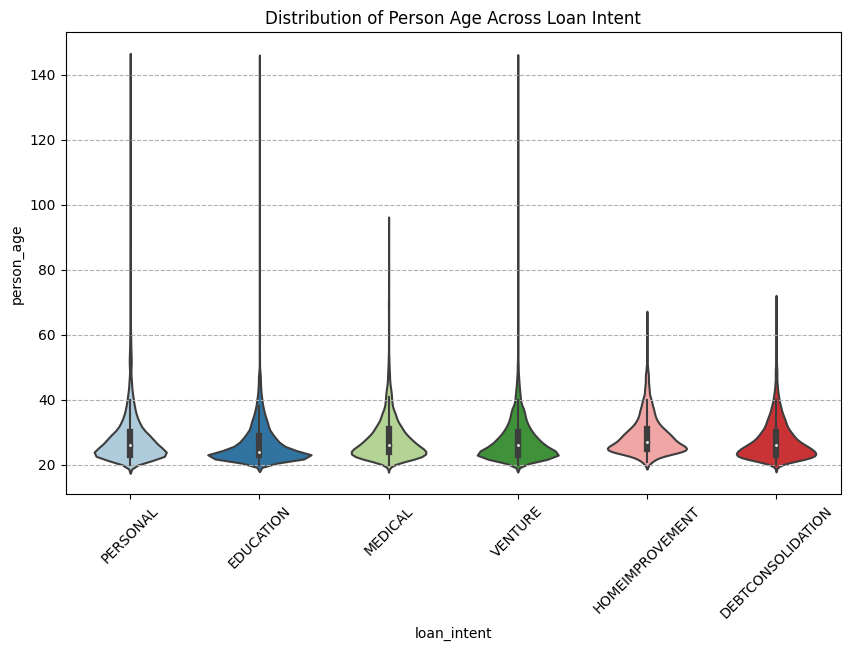

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='loan_intent', y='person_age', data=df, palette='Paired')
plt.grid(True, linestyle='--', axis='y')

# Labels
plt.title('Distribution of Person Age Across Loan Intent')
plt.xticks(rotation=45)

*   For obvious reason the age for loan intended for Education is concentrated between 20 and 25 years old.
*   Home Improvement seems to show a longuer body indicated that the age range is wider than other intent. Similar to Medical.

# Pair plot

In order to improve visibility, only a sample of 1000 were used to construct the pair plot.

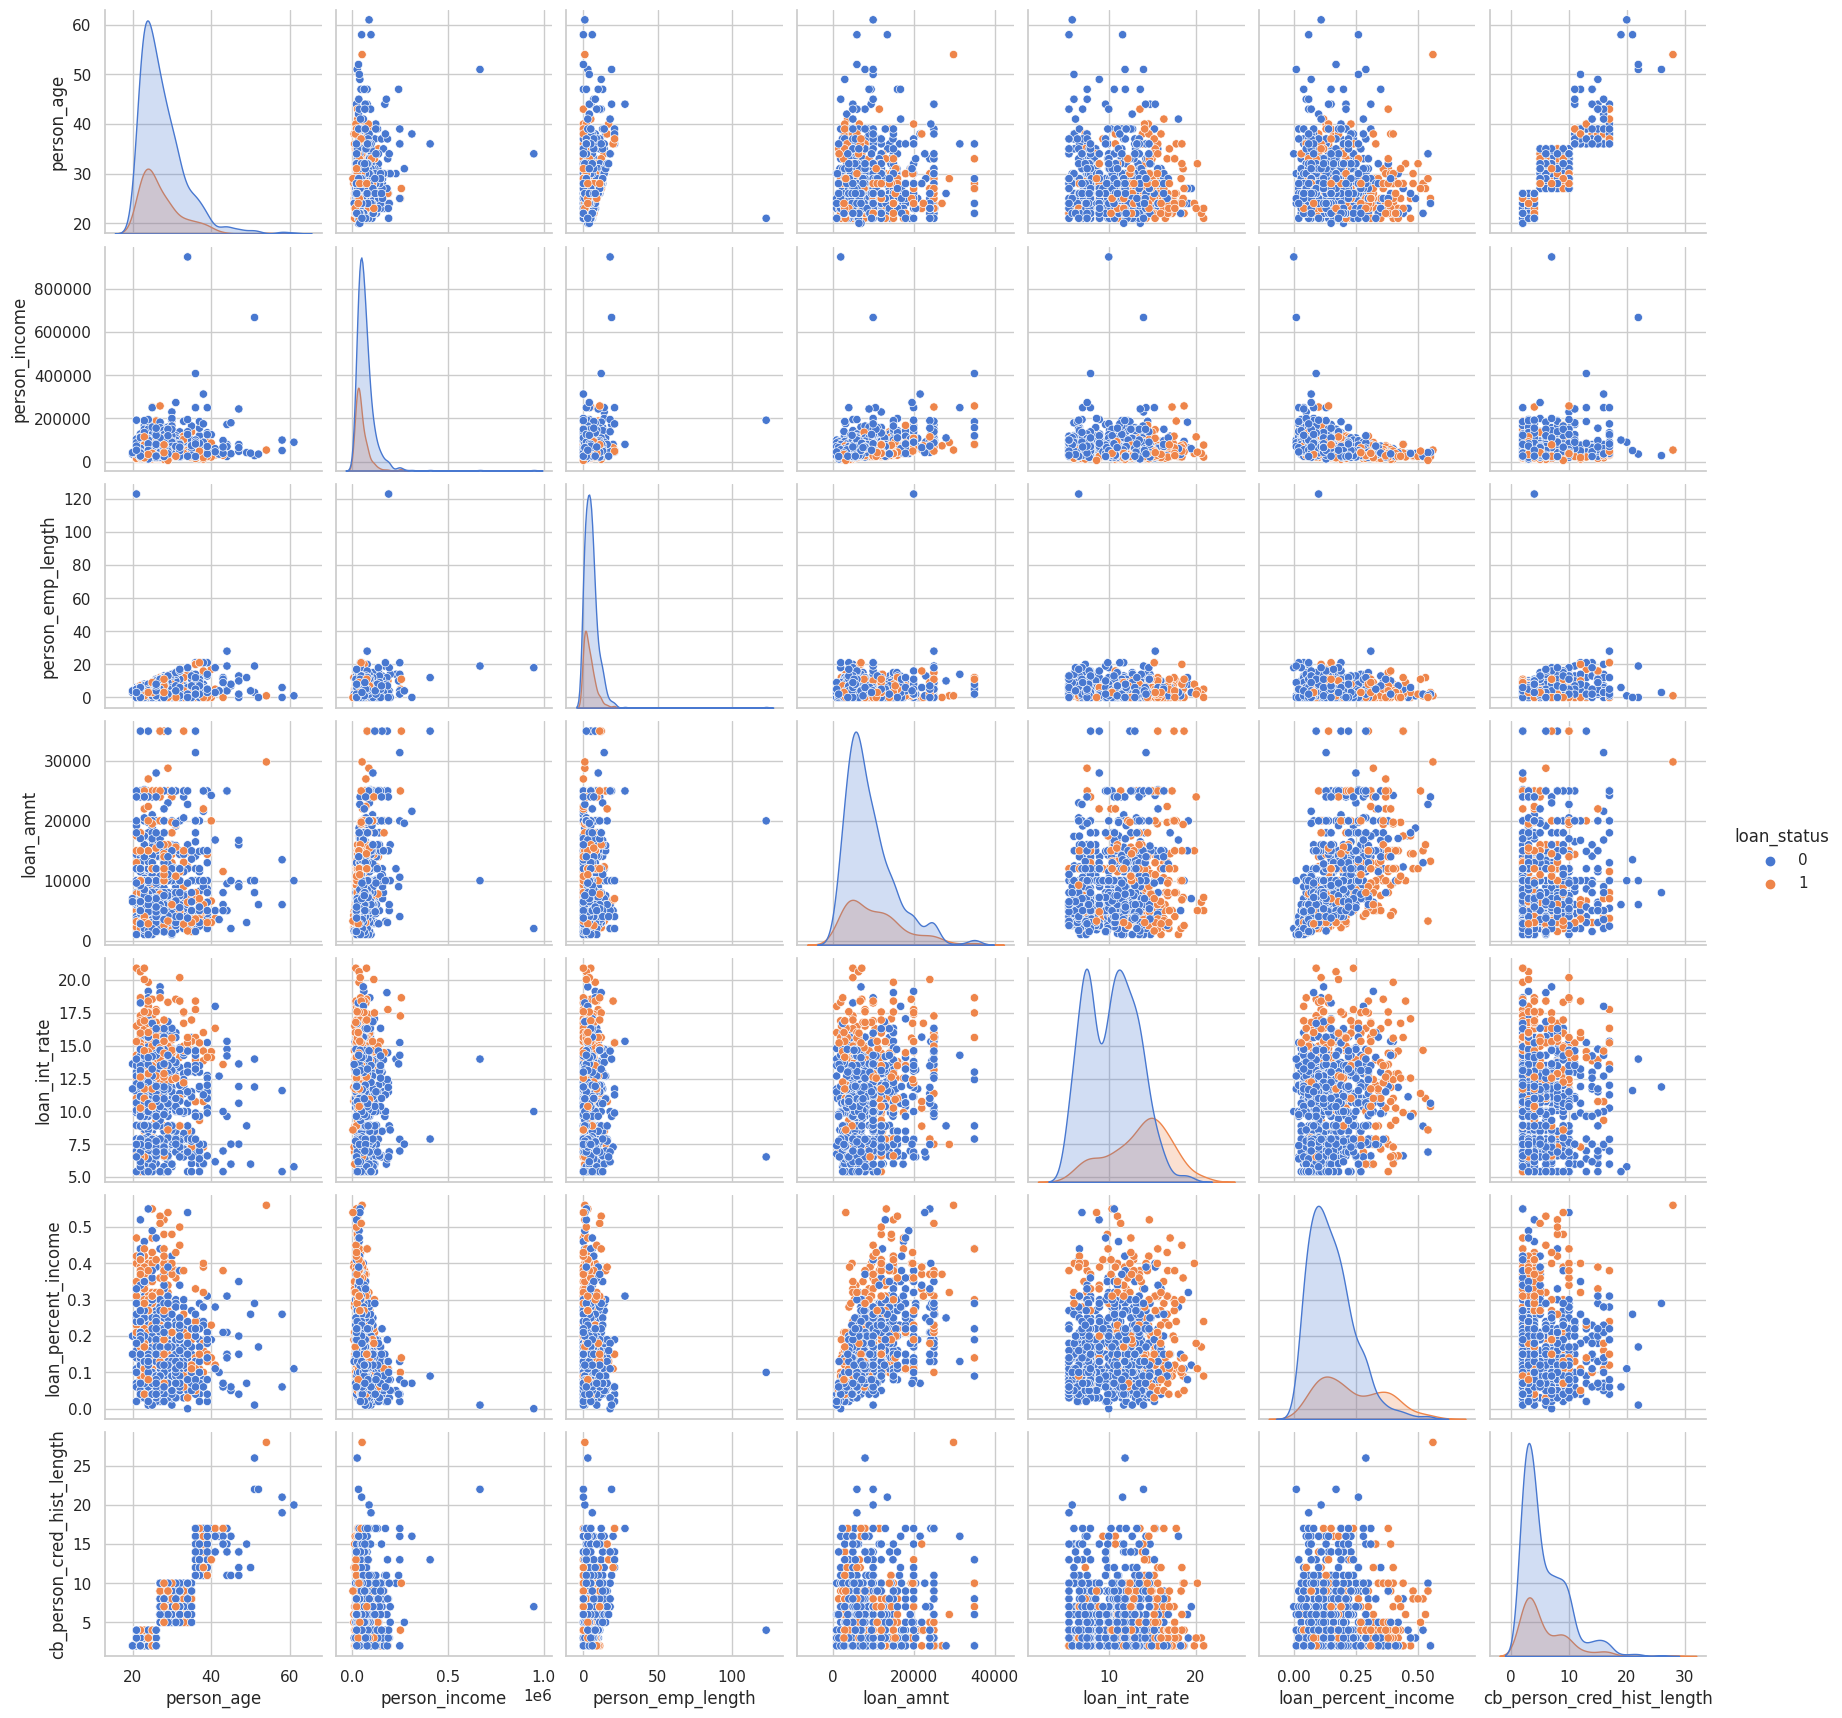

In [ ]:
# Create a pair plot
sns.set(style="whitegrid", palette="muted")
sns.pairplot(df.sample(n=1000, random_state=42), hue="loan_status")

*   There is a non-linear relationship between 'loan_percent_income' and 'person_income'. The smaller the income the more likely it is that the percentage of income will be higher, the inverse is true for higher income that are more likely to have lower percentage of income. **'Default' is more likely to hapen for applicant with low income and high loan percentage income.**
*   There is a strange looking relationship between 'person_age' and 'cb_person_cre_hist_legth'. **The older the applicant the higher the credit history length.**
*   Looking at the distribution graph we can see that and 'loan_percent_income' and 'loan_int_rate' seem to be good indicater for default as there is a lack of overlap beteen the two curves.

# **Data Preparation/Cleaning**

# Duplicate data

In [ ]:
# Look for duplicated rows in the dataset
dups = df.duplicated()
dups.value_counts()

False    32416
True       165
dtype: int64

There are 165 rows that are duplicates (0.5%).

In [ ]:
# Delete duplicate rows
df.drop_duplicates(inplace=True)

# Outliers

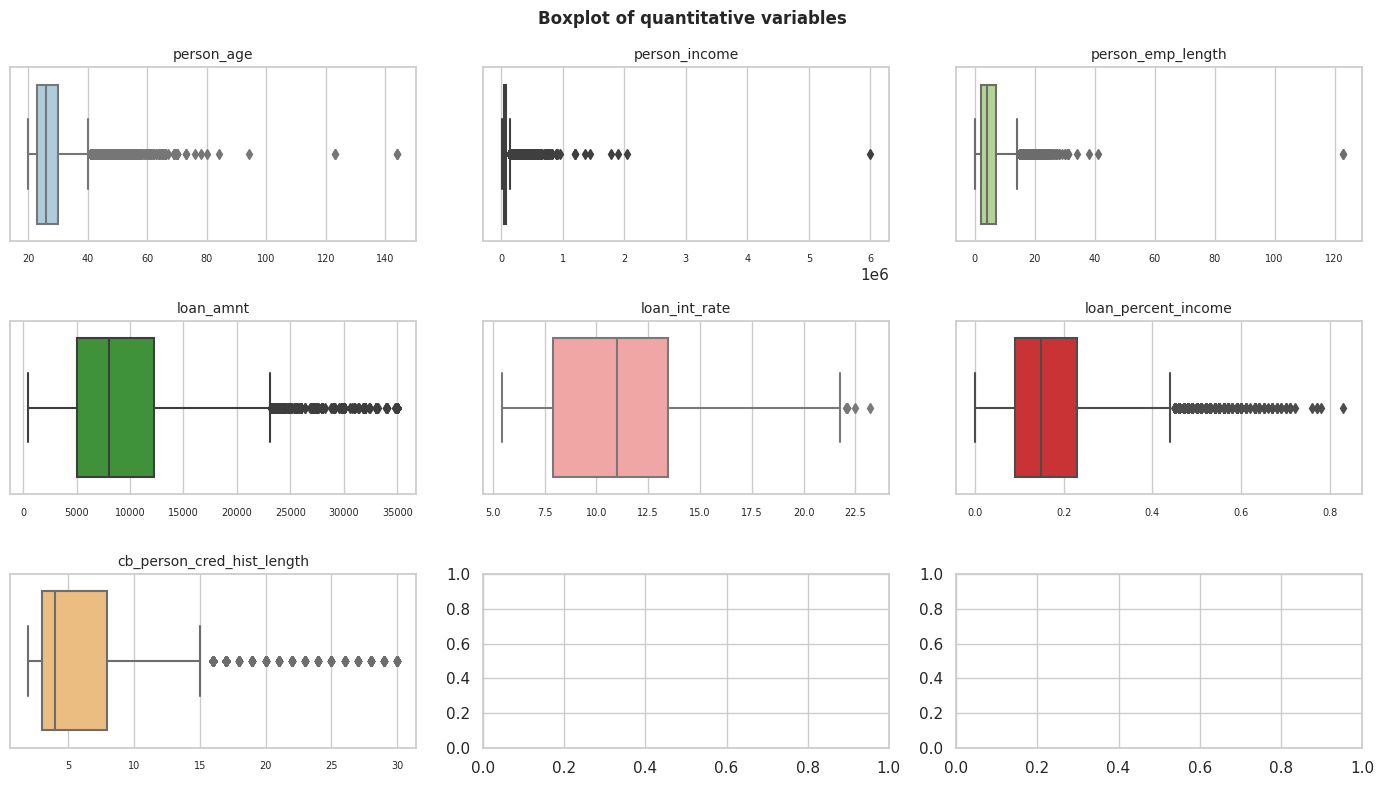

In [ ]:
# List of numerical variables:
num_cols = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate",
            "loan_percent_income", "cb_person_cred_hist_length"]

# Create Boxplot of numerical variables
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 8))
axes = axes.flat

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=df, color=sns.color_palette("Paired")[i], ax=axes[i])

    axes[i].set_xlabel("")
    axes[i].set_title(f"{col}", fontsize=10)
    axes[i].tick_params(labelsize=7)

fig.suptitle("Boxplot of quantitative variables", fontsize=12, fontweight="bold")
fig.tight_layout()

*   The 3 variables with very noticable outliers are person_age, person_income and person_emp_length.
*   We will explore those variables in more details.

**Age:**

Using domain knowledge.

Typically the upper limit for the age of a loan applicant is between 70 and 95yo.

We can see on the box plot that there are some outliers values above this threashold.

In [ ]:
# Count the number of rows where age is greater than 95
count_outliers_age = df[df['person_age'] > 95].shape[0]
print("Number of rows where age > 95:", count_outliers_age)

# List the values where 'person_age' is greater than 95
outliers_list_age = df[df['person_age'] > 95]['person_age'].tolist()
print("List of values where age > 95:", outliers_list_age)

Number of rows where age > 95: 5
List of values where age > 95: [144, 144, 123, 123, 144]


There are 6 records with age > 95. Those age include, 144 and 123 years old which are unrealistic. Those records are deleted.

In [ ]:
# Delete the rows where 'person_age' is greater than 95
df.drop(df.loc[df['person_age'] >= 95].index, inplace=True)

**Applicant Income**

In [ ]:
# Count the number where rows where income is greater than 1,000,000
count_outliers_income = df[df['person_income'] > 1000000].shape[0]
print("Number of rows where income > 1,000,000:", count_outliers_income)

# List the values where 'person_income' is greater than 1,000,000
outliers_list_income = df[df['person_income'] > 1000000]['person_income'].tolist()
print("List of values where income > 1,000,000:", outliers_list_income)

# Count the number of rows where income is greater than 650,000
count_outliers_income2 = df[df['person_income'] > 650000].shape[0]
print("Number of rows where income > 650,000:", count_outliers_income2)

Number of rows where income > 1,000,000: 8
List of values where income > 1,000,000: [1200000, 1200000, 1200000, 2039784, 1362000, 1440000, 1782000, 1900000]
Number of rows where income > 650,000: 31


There are 8 strong outliers with income above 1 million, and 31 records of applicant with an income of over 650000. Such income is rare but is realistic therefore the records are kept.

**Employement Length**

In [ ]:
# Count the number of rows where employement length is greater than 60
count_outliers_emp = df[df['person_emp_length'] > 60].shape[0]
print("Number of rows where employement length > 60:", count_outliers_emp)

# List the values where 'person_emp_length' is greater than 60
outliers_list_emp = df[df['person_emp_length'] > 60]['person_emp_length'].tolist()
print("List of values where employement length > 60:", outliers_list_emp)

Number of rows where employement length > 60: 2
List of values where employement length > 60: [123.0, 123.0]


In [ ]:
# Delete the rows where 'person_emp_length' is greater than 60
df.drop(df.loc[df['person_emp_length'] >= 60].index, inplace=True)

It is very unlikely for someone to be working more that 60 years at the same position. The two records with 123 years are totaly unrealistic, therefore they are deleted.

# Missing Values

Those are inaccesible, lost forever values as we have no way of knowing the real value if they ever had one.

The data point seems to be Missing completely at random.

In [ ]:
print(df.isnull().sum(), '\n')
print('Pecentage of missing values for perons_emp_length: ',df['person_emp_length'].isnull().mean() * 100)
print('Pecentage of missing values for loan_int_rate: ',df['loan_int_rate'].isnull().mean() * 100)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3094
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64 

Pecentage of missing values for perons_emp_length:  2.736894072634145
Pecentage of missing values for loan_int_rate:  9.546730846369837


<Axes: >

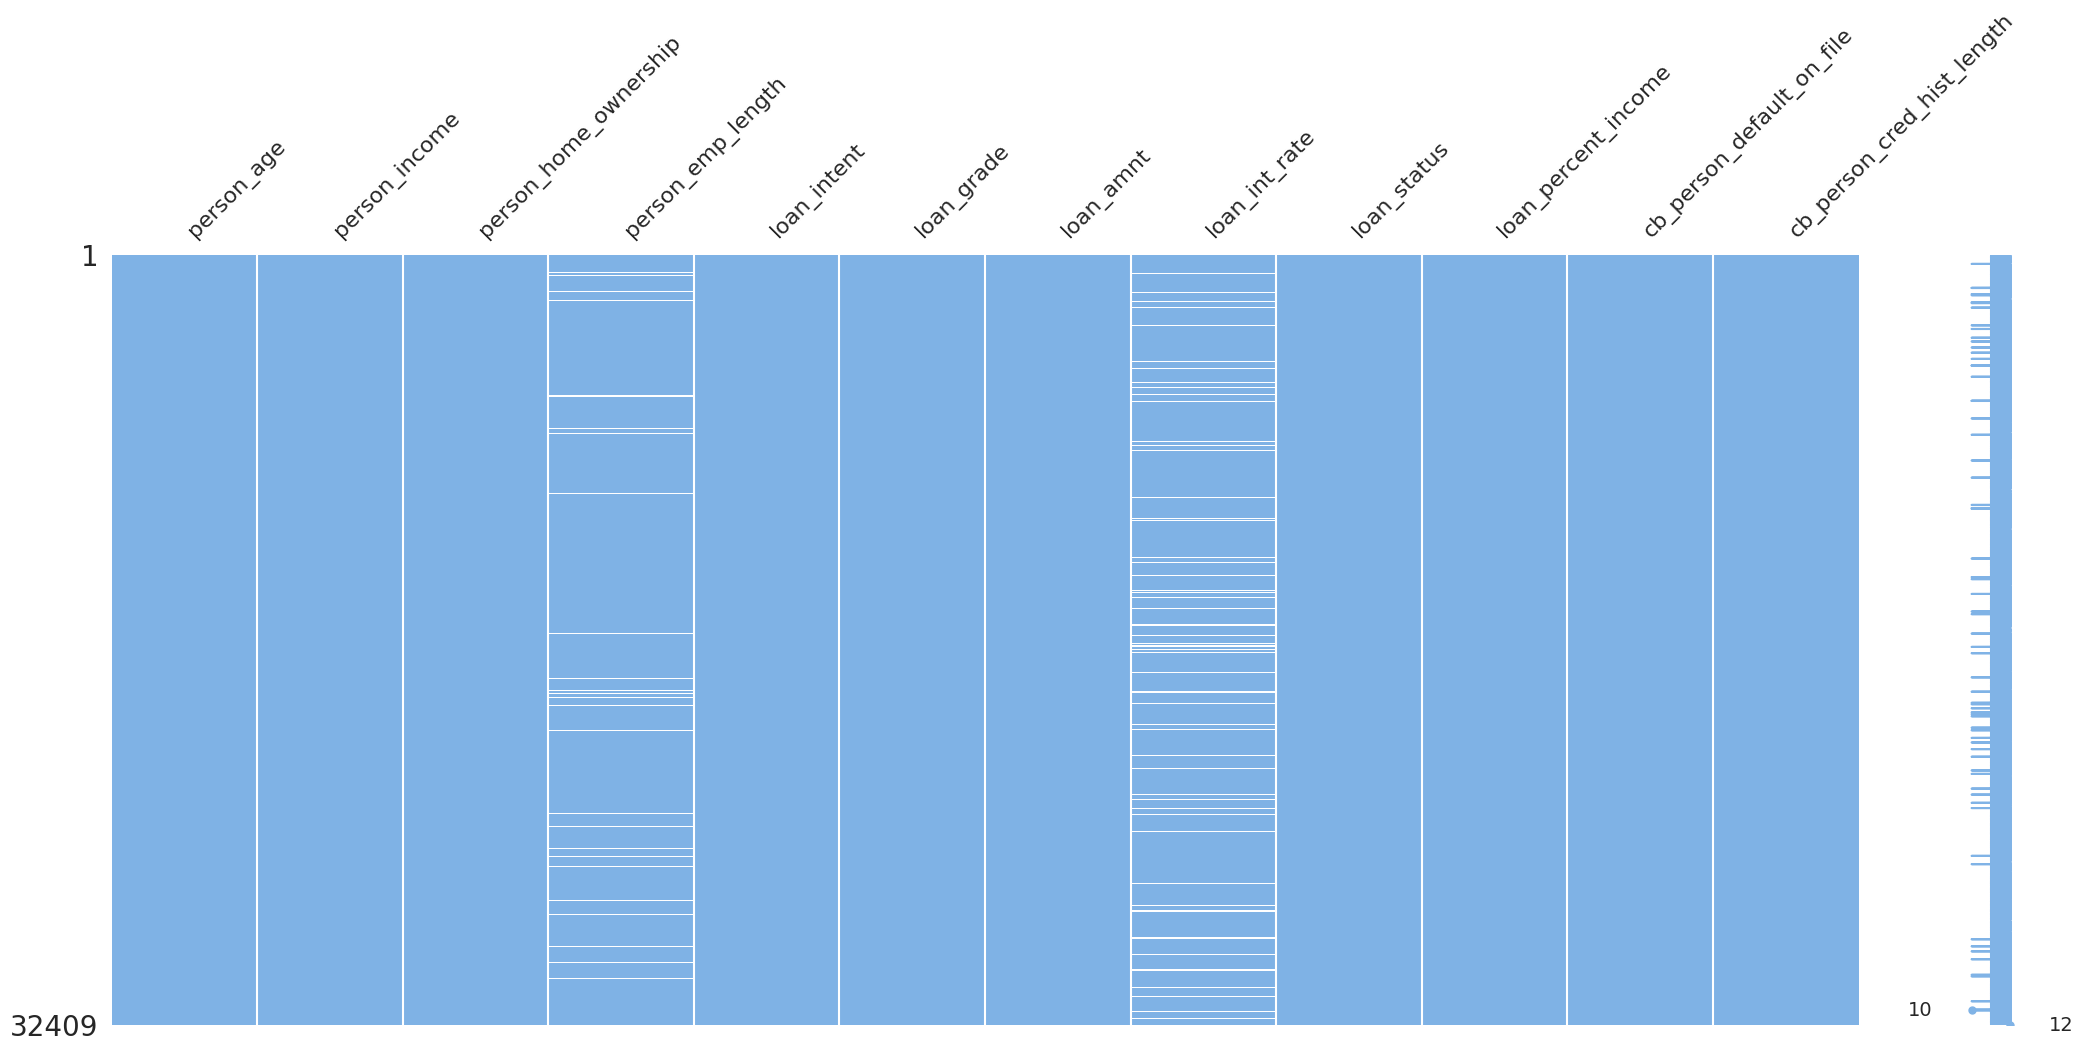

In [ ]:
# Create missing value matrix using the missingno function
msno.matrix(df, color=[0.5,0.7,0.9])

*   'person_emp_length' has 887 missing values (2.7% of records) and 'loan_int_rate' has 3093 (9.5% of records). A total of 3980 missing values.
*   The matrix plot provides a colour fill for each column. When data is present, the plot is shaded , and when it is absent the plot is displayed in white.
*   The missing data seems to appear at radnom througout the dataset.

# Imputer Comparison

In [ ]:
# Create a copy of the dataset
df_copy = df.copy()

# Define mappings for encoding
mappings = {
	    'person_home_ownership': {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3},
	    'loan_intent': {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5},
	    'loan_grade': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6},
	    'cb_person_default_on_file': {'Y': 0, 'N': 1}
}
# Encode categorical variables
for col, mapping in mappings.items():
	    df_copy[col] = df_copy[col].replace(mapping)

cols_to_norm = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
# Define Scaler
scal = StandardScaler()
# Scaling numerical variables
df_copy[cols_to_norm] = scal.fit_transform(df_copy[cols_to_norm])

# Split the dataset into X independent variables and y dependent variable (target)
X = df_copy.drop('loan_status', axis=1)
y = df_copy['loan_status']

## IterativeImputer

In [ ]:
# Evaluate different number maximun number of iteration through simulation
results = list()
strategies = [str(i) for i in range(1, 10)]

for s in strategies:
  # Create the modeling pipeline
  pipeline_iterative = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m',
  RandomForestClassifier())])
  # Evaluate the model
  cv_iterative = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores_iterative = cross_val_score(pipeline_iterative, X, y, scoring='recall', cv=cv_iterative, n_jobs=-1)
  # Results
  results.append(scores_iterative)
  print('>%s %.3f (%.3f)' % (s, mean(scores_iterative), std(scores_iterative)))

>1 0.714 (0.019)
>2 0.715 (0.020)
>3 0.715 (0.020)
>4 0.716 (0.020)


In [ ]:
# define imputer
imputer_iterative = IterativeImputer(imputation_order='ascending', max_iter=7)
# Fit and Transform
imputed_iterative = imputer_iterative.fit_transform(X)

In [ ]:
df_imputed_iterative = pd.DataFrame(imputed_iterative, columns=X.columns)

# Merge Imputed dataset with target variable
df_imputed_iterative.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
iterative_clean_df = pd.concat([df_imputed_iterative, y], axis=1)

In [ ]:
iterative_clean_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [ ]:
reverse_mappings = {
	    'person_home_ownership': {0: 'RENT', 1: 'OWN', 2: 'MORTGAGE', 3: 'OTHER'},
	    'loan_intent': {0: 'PERSONAL', 1: 'EDUCATION', 2: 'MEDICAL', 3: 'VENTURE', 4: 'HOMEIMPROVEMENT', 5: 'DEBTCONSOLIDATION'},
	    'loan_grade': {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'},
	    'cb_person_default_on_file': {0: 'Y', 1: 'N'}
}

for column, mapping in reverse_mappings.items():
	    iterative_clean_df[column] = iterative_clean_df[column].replace(mapping)

iterative_clean_df[cols_to_norm] = scal.inverse_transform(iterative_clean_df[cols_to_norm])

In [ ]:
# Extract the two columns from each dataframe
column1_df1 = iterative_clean_df['person_emp_length']
column2_df1 = iterative_clean_df['loan_int_rate']

column1_df2 = df['person_emp_length']
column2_df2 = df['loan_int_rate']

# Describe for each column in each dataframe
describe_df1 = pd.DataFrame({'person_emp_length': column1_df1, 'loan_int_rate': column2_df1}).describe()
describe_df2 = pd.DataFrame({'person_emp_length': column1_df2, 'loan_int_rate': column2_df2}).describe()

# Print or display the comparison dataframes
print("Describe Statistics for clean_df:")
print(describe_df1)

print("\nDescribe Statistics for df:")
print(describe_df2)

Describe Statistics for clean_df:
       person_emp_length  loan_int_rate
count          32409.000      32409.000
mean               4.776         11.013
std                3.987          3.215
min                0.000          5.420
25%                2.000          7.900
50%                4.000         10.990
75%                7.000         13.230
max               41.000         23.373

Describe Statistics for df:
       person_emp_length  loan_int_rate
count          31522.000      29315.000
mean               4.783         11.017
std                4.037          3.242
min                0.000          5.420
25%                2.000          7.900
50%                4.000         10.990
75%                7.000         13.470
max               41.000         23.220


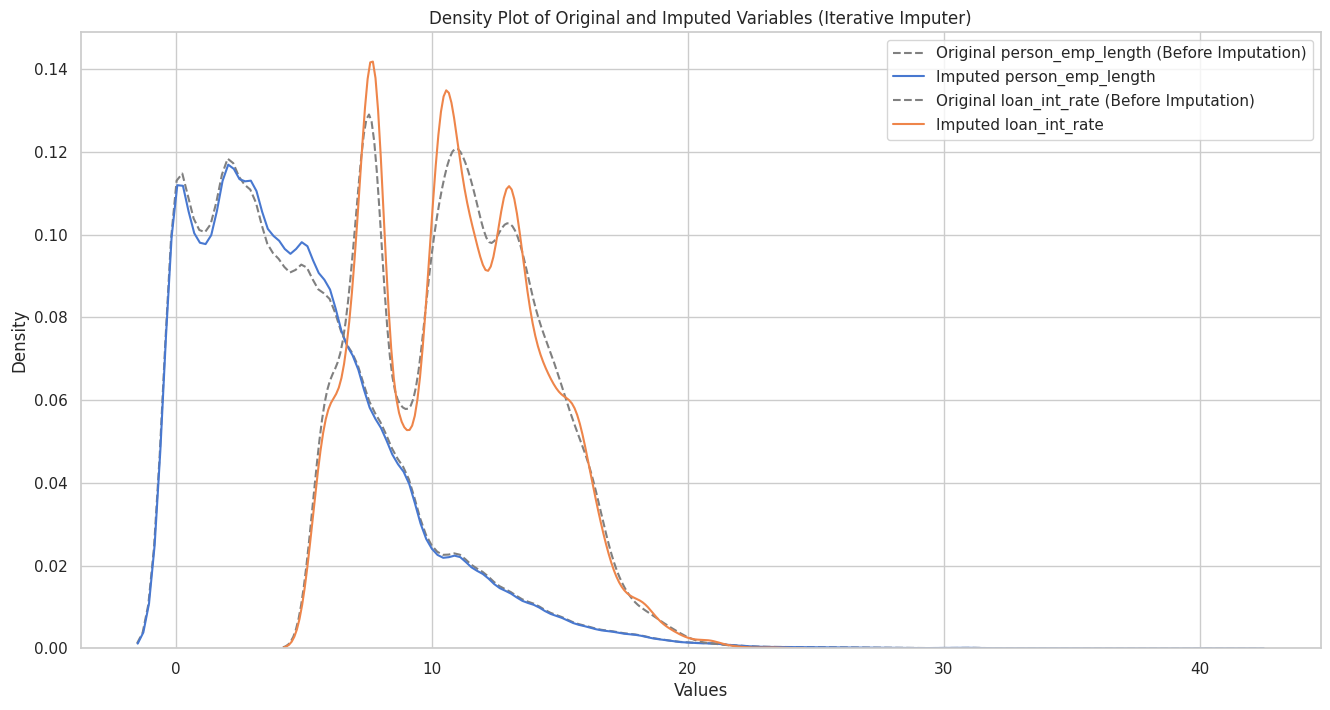

In [ ]:
imputed_cols = ['person_emp_length', 'loan_int_rate']
fig, ax = plt.subplots(figsize=(16, 8))

# Create Density Plot
for col in imputed_cols:
	  sns.kdeplot(df[col].dropna(), label=f'Original {col} (Before Imputation)', linestyle='--', color='gray')
	  sns.kdeplot(iterative_clean_df[col], label=f'Imputed {col}')

# Labels
plt.title('Density Plot of Original and Imputed Variables (Iterative Imputer)')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

*   Comparing the dentisity for both variable show that the imputed values did not change the distribution of person_emp_length but much.
*   There are slight changes to the loan_int_rate distribution, displaying higher highs after imputation but overall staying close to the original.
*   Looking at the mean and variance shows there hasnt beend a lost of changes between the original distribution and the imputed one.

## KNNImputer

In [ ]:
# Evaluate different number of K cluster through simulation
results = list()
cluster_nb = [str(i) for i in [1,3,5,7,9,15,18,21]]

for s in cluster_nb:
  # Create modeling pipeline
  pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
  # Evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1)
  # Results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))


>1 0.715 (0.021)
>3 0.715 (0.020)
>5 0.715 (0.020)
>7 0.715 (0.021)
>9 0.715 (0.020)
>15 0.716 (0.019)
>18 0.715 (0.019)
>21 0.715 (0.019)


In [ ]:
# Define KNNImputer
K_imputer = KNNImputer(n_neighbors=3, weights="uniform")
# Fit and Transform the X dataset
K_imputed = K_imputer.fit_transform(X)

In [ ]:
df_K_imputed = pd.DataFrame(K_imputed, columns=X.columns)

# Merge Imputed dataset with target variable
df_K_imputed.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
K_clean_df = pd.concat([df_K_imputed, y], axis=1)

In [ ]:
K_clean_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [ ]:
reverse_mappings = {
	    'person_home_ownership': {0: 'RENT', 1: 'OWN', 2: 'MORTGAGE', 3: 'OTHER'},
	    'loan_intent': {0: 'PERSONAL', 1: 'EDUCATION', 2: 'MEDICAL', 3: 'VENTURE', 4: 'HOMEIMPROVEMENT', 5: 'DEBTCONSOLIDATION'},
	    'loan_grade': {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'},
	    'cb_person_default_on_file': {0: 'Y', 1: 'N'}
}

for column, mapping in reverse_mappings.items():
	    K_clean_df[column] = K_clean_df[column].replace(mapping)

K_clean_df[cols_to_norm] = scal.inverse_transform(K_clean_df[cols_to_norm])

In [ ]:
# Extract the two columns from each dataframe
column1_df1 = K_clean_df['person_emp_length']
column2_df1 = K_clean_df['loan_int_rate']

column1_df2 = df['person_emp_length']
column2_df2 = df['loan_int_rate']

# Describe for each column in each dataframe
describe_df1 = pd.DataFrame({'person_emp_length': column1_df1, 'loan_int_rate': column2_df1}).describe()
describe_df2 = pd.DataFrame({'person_emp_length': column1_df2, 'loan_int_rate': column2_df2}).describe()

# Print or display the comparison dataframes
print("Describe Statistics for clean_df:")
print(describe_df1)

print("\nDescribe Statistics for df:")
print(describe_df2)

Describe Statistics for clean_df:
       person_emp_length  loan_int_rate
count          32409.000      32409.000
mean               4.775         11.010
std                4.007          3.222
min                0.000          5.420
25%                2.000          7.900
50%                4.000         10.990
75%                7.000         13.470
max               41.000         23.220

Describe Statistics for df:
       person_emp_length  loan_int_rate
count          31522.000      29315.000
mean               4.783         11.017
std                4.037          3.242
min                0.000          5.420
25%                2.000          7.900
50%                4.000         10.990
75%                7.000         13.470
max               41.000         23.220


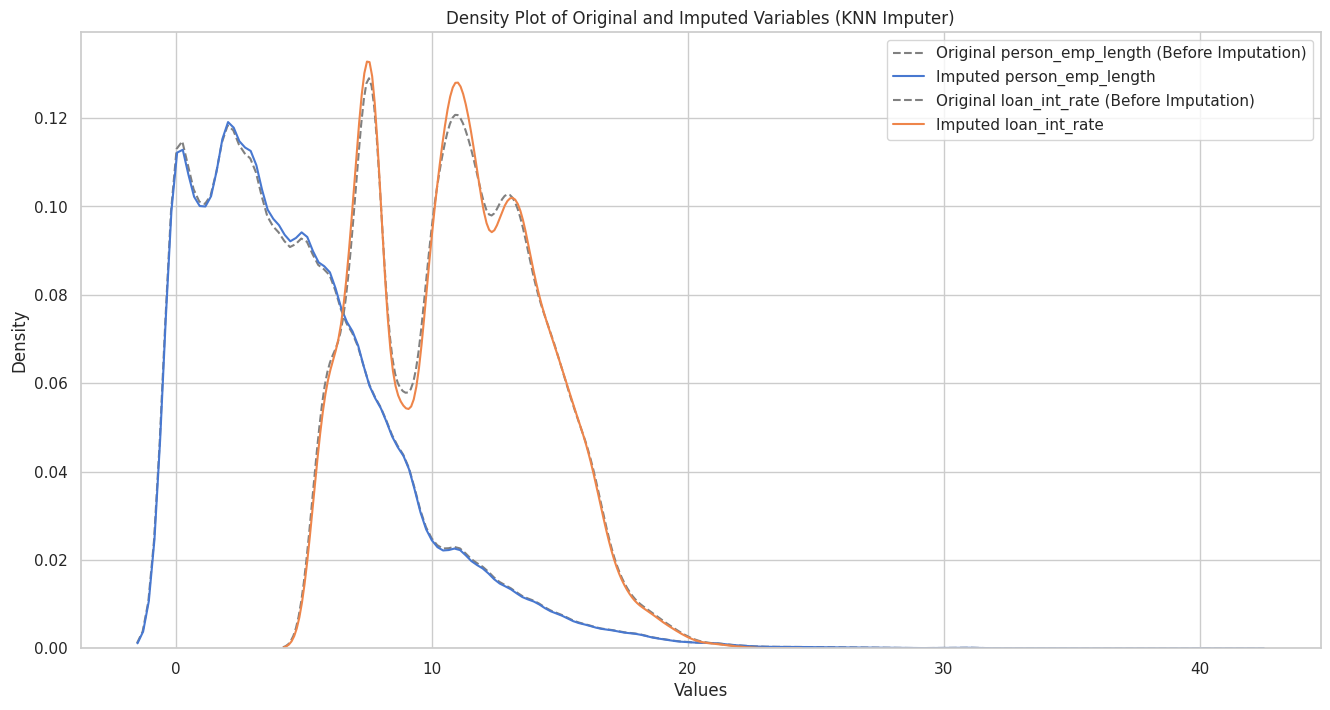

In [ ]:
imputed_cols = ['person_emp_length', 'loan_int_rate']
fig, ax = plt.subplots(figsize=(16, 8))

# Create Density Plot
for col in imputed_cols:
	  sns.kdeplot(df[col].dropna(), label=f'Original {col} (Before Imputation)', linestyle='--', color='gray')
	  sns.kdeplot(K_clean_df[col], label=f'Imputed {col}')

# Labels
plt.title('Density Plot of Original and Imputed Variables (KNN Imputer)')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()



*   Both Imputer display similar results both in model accuracy and variance measure (mean, std)
*   The KNN Imputer exhibit a more fiting density plot therefore, it is selected to go forward.



# **Export**

The dataset without outliers or duplicates is exported to google drive. This dataset will then be use for modelling. To prevent data leakage, missing values will be imputed after the train/test split.

In [ ]:
# Export cleaned dataset to Google Drive with missing values
df.to_csv('clean_data.csv')
df.to_csv('/content/drive/MyDrive/Colab Notebooks/clean_data.csv')